In [37]:
import matplotlib.pyplot as plt
import numpy as np

In [38]:
flow_rates = [(0,1.3), (2,1.9), (3,0.6), (4,0.0), (7,2.1), (8,2.0)]

In [80]:
def plot_time_series(time_series,tmin,tmax,tlabel=None,xlabel=None):
    ts = [t for t,x in time_series]
    xs = [x for t,x in time_series]
    plt.scatter(ts, xs)
    plt.xlabel(tlabel,fontsize=18)
    plt.ylabel(xlabel,fontsize=18)
    total_t = tmax-tmin
    plt.plot([tmin-total_t/10,tmax+total_t/10],[0,0],c='k',linewidth=1)
    plt.xlim(tmin-total_t/10,tmax+total_t/10)
    xmin, xmax = plt.ylim()
    plt.plot([0,0],[xmin,xmax],c='k',linewidth=1)
    plt.ylim(xmin,xmax)

def plot_function(f,tmin,tmax,tlabel=None,xlabel=None,axes=False, **kwargs):
    ts = np.linspace(tmin,tmax,1000)
    if tlabel:
        plt.xlabel(tlabel,fontsize=18)
    if xlabel:
        plt.ylabel(xlabel,fontsize=18)
    plt.plot(ts, [f(t) for t in ts], **kwargs)
    if axes:
        total_t = tmax-tmin
        plt.plot([tmin-total_t/10,tmax+total_t/10],[0,0],c='k',linewidth=1)
        plt.xlim(tmin-total_t/10,tmax+total_t/10)
        xmin, xmax = plt.ylim()
        plt.plot([0,0],[xmin,xmax],c='k',linewidth=1)
        plt.ylim(xmin,xmax)
    
def piecewise_constant_interpolate(time_series,time):
    value = time_series[0][1]
    for t,x in time_series:
        if t > time:
            return value
        else:
            value = x
    return value

def q(t):
    return piecewise_constant_interpolate(flow_rates,t)

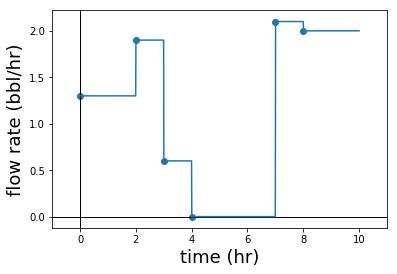

In [81]:
plot_time_series(flow_rates,0,10,tlabel='time (hr)',xlabel='flow rate (bbl/hr)')
plot_function(q,0,10)

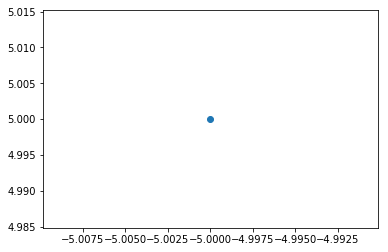

In [41]:
plt.scatter([-5],[5])

In [42]:
# [(0,1.3), (2,1.9), (3,0.6), (4,0.0), (7,2.1), (8,2.0)]
2*1.3 + 1.9 + 0.6 + 2.1 + 2*2.0

11.2

In [43]:
[q(t) for t in range(0,10)]

[1.3, 1.3, 1.9, 0.6, 0.0, 0.0, 0.0, 2.1, 2.0, 2.0]

In [44]:
sum([q(t) for t in range(0,10)])

11.2

In [45]:
half_hours = [0.5 * i for i in range(0,20)]
sum([0.5 * q(t) for t in half_hours])

11.2

In [46]:
import numpy as np
def definite_integral(f,tstart,tend,interval):
    all_intervals = np.arange(tstart,tend,interval)
    return sum([interval * q(t) for t in all_intervals])

In [47]:
definite_integral(q,0,10,0.25)

11.200000000000003

In [48]:
def draw_rectangle(f,x,dx):
    y = f(x)
    plt.plot([x,x,x+dx,x+dx,x],
             [0,y,y,0,0], c='C1')

    plt.gca().fill([x,x,x+dx,x+dx],
                     [0,y,y,0],c='C1',alpha=0.3)
    
def draw_definite_integral(f,tstart,tend,interval):
    all_intervals = np.arange(tstart,tend,interval)
    for t in all_intervals:
        draw_rectangle(f,t,interval)

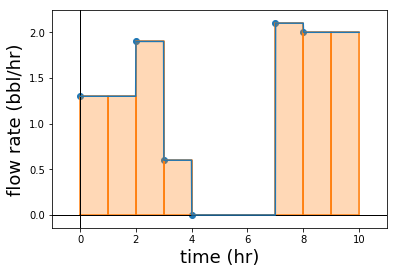

In [49]:
draw_definite_integral(q,0,10,1)
plot_time_series(flow_rates,0,10,tlabel='time (hr)',xlabel='flow rate (bbl/hr)')
plot_function(q,0,10)


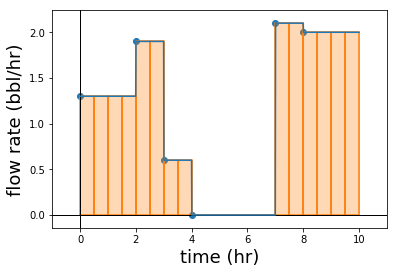

In [50]:
draw_definite_integral(q,0,10,0.5)
plot_time_series(flow_rates,0,10,tlabel='time (hr)',xlabel='flow rate (bbl/hr)')
plot_function(q,0,10)

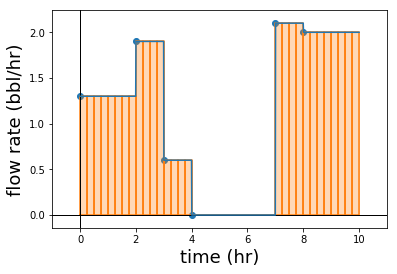

In [51]:
draw_definite_integral(q,0,10,0.25)
plot_time_series(flow_rates,0,10,tlabel='time (hr)',xlabel='flow rate (bbl/hr)')
plot_function(q,0,10)

10.4

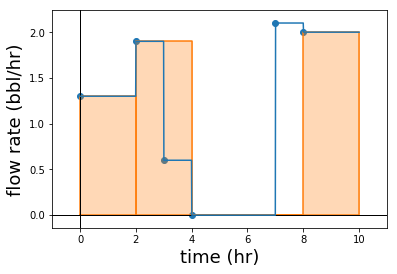

In [52]:
draw_definite_integral(q,0,10,2)
plot_time_series(flow_rates,0,10,tlabel='time (hr)',xlabel='flow rate (bbl/hr)')
plot_function(q,0,10)
definite_integral(q,0,10,2)

In [53]:
[q(t) for t in range(0,10)]

[1.3, 1.3, 1.9, 0.6, 0.0, 0.0, 0.0, 2.1, 2.0, 2.0]

In [54]:
def total_volume(q,q0,t):
    return q0 + definite_integral(q,0,t,0.01)

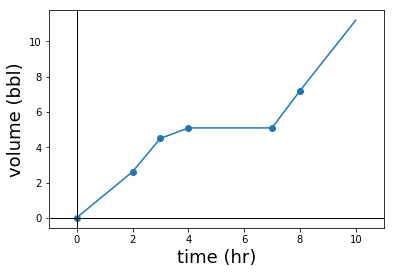

In [55]:
plot_function(lambda t: total_volume(q,0,t),0,10,axes=True,tlabel='time (hr)',xlabel='volume (bbl)')
plt.scatter([t for (t,r) in flow_rates], [total_volume(q,0,t) for (t,r) in flow_rates])

5.714999999999954

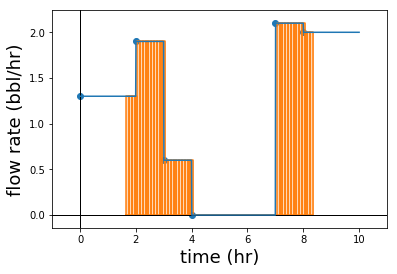

In [56]:
draw_definite_integral(q,1.65,8.33,0.1)
plot_time_series(flow_rates,0,10,tlabel='time (hr)',xlabel='flow rate (bbl/hr)')
plot_function(q,0,10)
definite_integral(q,1.65,8.33,0.01)

In [57]:
definite_integral(q,1.65,8.33,0.1)

5.720000000000001

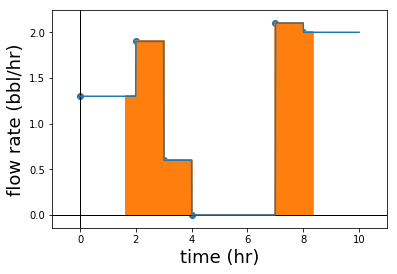

In [58]:
draw_definite_integral(q,1.65,8.33,0.01)
plot_time_series(flow_rates,0,10,tlabel='time (hr)',xlabel='flow rate (bbl/hr)')
plot_function(q,0,10)

In [59]:
1.3 * 0.35 + 1.9 + 0.6 + 2.1 + 0.33 * 2.0

5.715

5.9


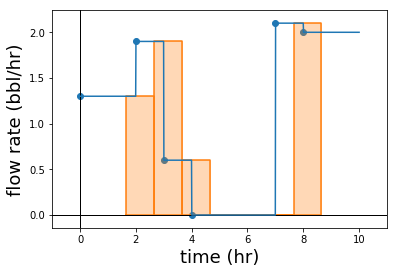

In [60]:
draw_definite_integral(q,1.65,8.33,1)
plot_time_series(flow_rates,0,10,tlabel='time (hr)',xlabel='flow rate (bbl/hr)')
plot_function(q,0,10)
print(definite_integral(q,1.65,8.33,1))

5.750000000000001


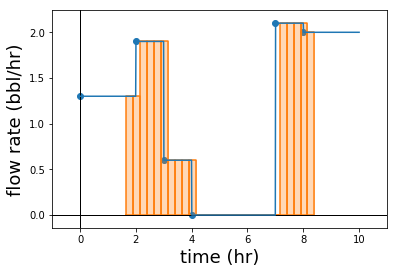

In [61]:
draw_definite_integral(q,1.65,8.33,0.25)
plot_time_series(flow_rates,0,10,tlabel='time (hr)',xlabel='flow rate (bbl/hr)')
plot_function(q,0,10)
print(definite_integral(q,1.65,8.33,0.25))

5.720000000000001


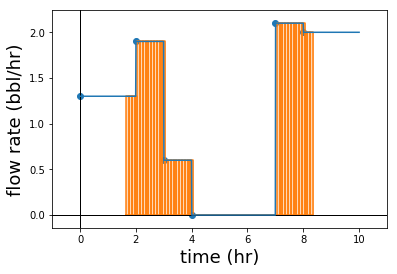

In [62]:
draw_definite_integral(q,1.65,8.33,0.1)
plot_time_series(flow_rates,0,10,tlabel='time (hr)',xlabel='flow rate (bbl/hr)')
plot_function(q,0,10)
print(definite_integral(q,1.65,8.33,0.1))

5.714999999999954


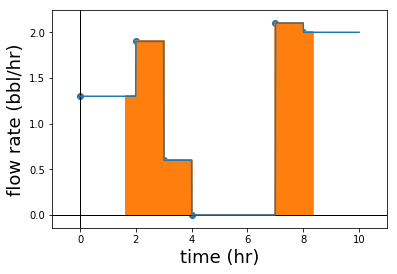

In [63]:
draw_definite_integral(q,1.65,8.33,0.01)
plot_time_series(flow_rates,0,10,tlabel='time (hr)',xlabel='flow rate (bbl/hr)')
plot_function(q,0,10)
print(definite_integral(q,1.65,8.33,0.01))

In [64]:
def find_total_volume(q,q0,t):
    return q0 + definite_integral(q,0,t,0.01)

def tank_volume(t):
    return find_total_volume(q,0.5,t)

5.300000000000012


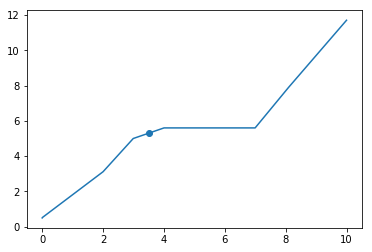

In [65]:
plot_function(tank_volume,0,10)
plt.scatter(3.5,tank_volume(3.5))
print(tank_volume(3.5))

4.800000000000012


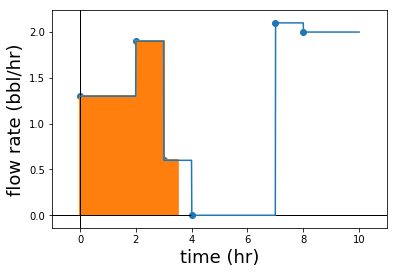

In [66]:
draw_definite_integral(q,0,3.5,0.01)
plot_time_series(flow_rates,0,10,tlabel='time (hr)',xlabel='flow rate (bbl/hr)')
plot_function(q,0,10)
print(definite_integral(q,0,3.5,0.01))

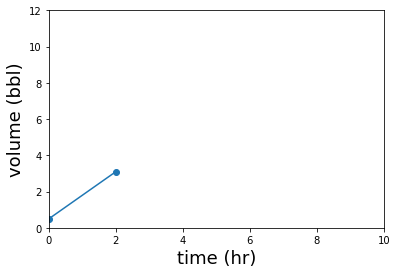

In [67]:
plot_function(lambda t: 0.5 + 1.3*t,0,2,tlabel='time (hr)',xlabel='volume (bbl)')
plt.xlim(0,10)
plt.ylim(0,12)
plt.scatter([0,2],[0.5,3.1])

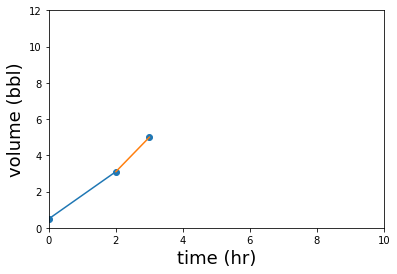

In [68]:
plot_function(lambda t: 0.5 + 1.3*t,0,2,tlabel='time (hr)',xlabel='volume (bbl)')
plot_function(lambda t: 3.1 + 1.9*(t-2),2,3)
# plot_function(lambda t: 5.0 + 0.6*(t-3),3,4)
# plot_function(lambda t: 5.6,4,7)
# plot_function(lambda t: 5.6 + 2.1*(t-7),7,8)
# plot_function(lambda t: 7.7 + 2*(t-8),8,10)
plt.xlim(0,10)
plt.ylim(0,12)
plt.scatter([0,2,3],[0.5,3.1,5.0])

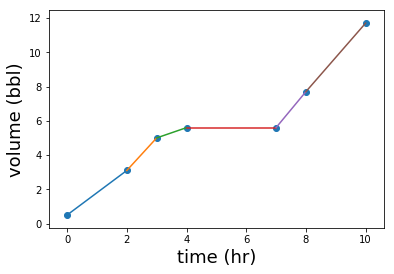

In [69]:
plot_function(lambda t: 0.5 + 1.3*t,0,2,tlabel='time (hr)',xlabel='volume (bbl)')
plot_function(lambda t: 3.1 + 1.9*(t-2),2,3)
plot_function(lambda t: 5.0 + 0.6*(t-3),3,4)
plot_function(lambda t: 5.6,4,7)
plot_function(lambda t: 5.6 + 2.1*(t-7),7,8)
plot_function(lambda t: 7.7 + 2*(t-8),8,10)
plt.scatter([0,2,3,4,7,8,10],[0.5,3.1,5,5.6,5.6,7.7,11.7])

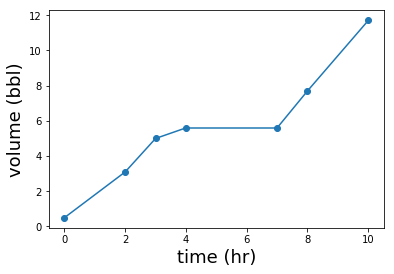

In [70]:
plt.scatter([0,2,3,4,7,8,10],[0.5,3.1,5,5.6,5.6,7.7,11.7])
plt.xlabel('time (hr)',fontsize=18)
plt.ylabel('volume (bbl)',fontsize=18)

plot_function(lambda t: 0.5 + 1.3*t,0,2,c='C0')
plot_function(lambda t: 3.1 + 1.9*(t-2),2,3,c='C0')
plot_function(lambda t: 5.0 + 0.6*(t-3),3,4,c='C0')
plot_function(lambda t: 5.6, 4, 7, c='C0')
plot_function(lambda t: 5.6 + 2.1*(t-7),7,8,c='C0')
plot_function(lambda t: 7.7 + 2*(t-8),8,10,c='C0')

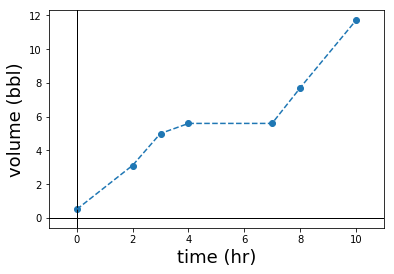

In [83]:
volumes = [(0,0.5), (2,3.1), (3,5.0), (4,5.6), (7,5.6), (8,7.7), (10,11.7)]
plot_time_series(volumes,0,10,tlabel='time (hr)',xlabel='volume (bbl)')
plot_function(tank_volume,0,10, linestyle='dashed')